In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
plt.style.use('seaborn')

In [111]:
df = pd.read_csv('time_series_2019-ncov-Confirmed.csv')

In [112]:
df.shape

(487, 65)

In [113]:
df.head(n=10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,64,64,73,103,103,186,231,271,424,424
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,92,112,134,171,210,267,307,353,436,533
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,36,49,57,71,94,121,121,121,229,296
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,35,46,61,68,78,94,144,184,221,221
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,5,7,7,7,33,35,37,51,53,84


In [114]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,30.580962,-33.601551,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,11.453799,12.661191,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,19.645817,81.064011,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,162.190044,163.249708,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,42.171200,22.380900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [115]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [116]:
col = df.columns

In [117]:
col_list = []

In [118]:
for c in col:
    cnt = (df[c]==0).sum()
    if cnt>340:
        col_list.append(c)

In [119]:
col_list

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20']

In [120]:
col_list.append('Province/State')
col_list.append('Lat')
#col_list.append('Long')

In [121]:
df = df.drop(columns = col_list)

In [122]:
df.shape

(487, 21)

In [123]:
del df['Long']

In [124]:
df.shape

(487, 20)

In [125]:
df.head(n=10)

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,Japan,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,Nepal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,Malaysia,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
5,Canada,12,13,21,21,27,32,32,39,46,64,64,73,103,103,186,231,271,424,424
6,Australia,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,533
7,Australia,10,10,10,11,11,15,18,21,21,36,49,57,71,94,121,121,121,229,296
8,Australia,11,13,13,13,15,15,18,20,20,35,46,61,68,78,94,144,184,221,221
9,Cambodia,1,1,1,1,2,2,2,3,3,5,7,7,7,33,35,37,51,53,84


In [126]:
df.drop_duplicates(subset='Country/Region', keep=False, inplace=True)

In [127]:
df.columns

Index(['Country/Region', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [128]:
df.head()

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,Japan,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,Nepal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,Malaysia,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [129]:
df['Country/Region'].value_counts()

Jordan       1
Vietnam      1
Nepal        1
Venezuela    1
Peru         1
            ..
Andorra      1
Czechia      1
Ethiopia     1
Cambodia     1
Bahrain      1
Name: Country/Region, Length: 163, dtype: int64

# 1. Country Wise Plot

In [130]:
col = list(df)

In [131]:
col

['Country/Region',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20']

In [132]:
country_names = df['Country/Region'].unique()

In [133]:
country = []
cases = []

In [134]:
for i in range(len(df)):
    country.append(df.iloc[i][0])
    cases.append(df.iloc[i][19])
    

In [135]:
country

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',
 'Serbia',
 'Slovakia',
 'Togo',
 'Malta

In [136]:
cases

[599,
 1086,
 455,
 2,
 1306,
 84,
 82,
 24873,
 626,
 153,
 380,
 396,
 59138,
 1934,
 28768,
 3401,
 327,
 248,
 233,
 55,
 40,
 332,
 188,
 201,
 254,
 7245,
 3244,
 1071,
 776,
 1593,
 54,
 624,
 114,
 2383,
 433,
 326,
 160,
 76,
 568,
 131,
 251,
 66,
 30,
 906,
 798,
 23,
 494,
 789,
 65,
 194,
 202,
 514,
 1600,
 113,
 139,
 115,
 511,
 67,
 225,
 632,
 112,
 73,
 131,
 37,
 634,
 75,
 126,
 414,
 274,
 2,
 40,
 231,
 134,
 363,
 222,
 185,
 16,
 90,
 37,
 187,
 13,
 27,
 22,
 89,
 95,
 88,
 75,
 1,
 10,
 245,
 21638,
 8897,
 712,
 1120,
 169,
 113,
 367,
 94,
 24,
 26,
 30,
 14,
 16,
 1236,
 35,
 7,
 60,
 11,
 2,
 2,
 15,
 1,
 135,
 24,
 3,
 7,
 50,
 70,
 4,
 5,
 19,
 2,
 19,
 2,
 1,
 5,
 2,
 3,
 3,
 6,
 43,
 2,
 3,
 1,
 12,
 14,
 21,
 14,
 18,
 3,
 1,
 1,
 4,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [137]:
df_new = pd.DataFrame(list(zip(country, cases)),columns =['country', 'cases'])

In [138]:
df_new.head()

,country,cases
0,Thailand,599
1,Japan,1086
2,Singapore,455
3,Nepal,2
4,Malaysia,1306


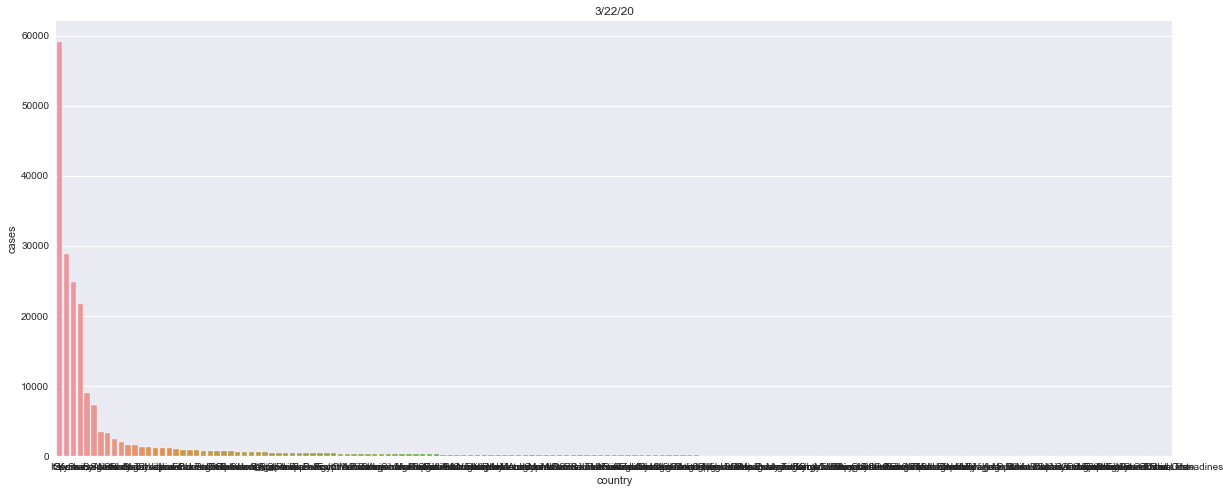

In [150]:
fig, ax = plt.subplots(figsize=(20,8))
corona = sns.barplot(x="country", y="cases", data=df_new)
plt.title('3/22/20')
plt.show(corona)

In [140]:
df_new.sort_values("cases", axis = 0, ascending = False,inplace = True, na_position ='last') 

In [167]:
df_new.head(n=60)

,country,cases
12,Italy,59138
14,Spain,28768
7,Germany,24873
90,Iran,21638
91,"Korea, South",8897
25,Switzerland,7245
15,Belgium,3401
26,Austria,3244
33,Norway,2383
13,Sweden,1934


In [183]:
final_country = []
final_cases   = []
for i in range(19):
    final_country.append(df_new.iloc[i][0])
    final_cases.append(df_new.iloc[i][1])

In [157]:
print(final_country,final_cases)

['Italy', 'Spain', 'Germany', 'Iran', 'Korea, South', 'Switzerland', 'Belgium', 'Austria', 'Norway', 'Sweden', 'Portugal', 'Brazil', 'Malaysia', 'Turkey', 'Czechia', 'Japan', 'Israel', 'Ireland', 'Luxembourg'] [59138, 28768, 24873, 21638, 8897, 7245, 3401, 3244, 2383, 1934, 1600, 1593, 1306, 1236, 1120, 1086, 1071, 906, 798]


In [158]:
summ = 0
for i in range(19,len(df_new)):
    summ =summ + df_new.iloc[i][1]

In [159]:
summ

18623

In [160]:
final_country.append("Others")
final_cases.append(summ)

In [161]:
df_final = pd.DataFrame(list(zip(final_country, final_cases)),columns =['country', 'cases'])

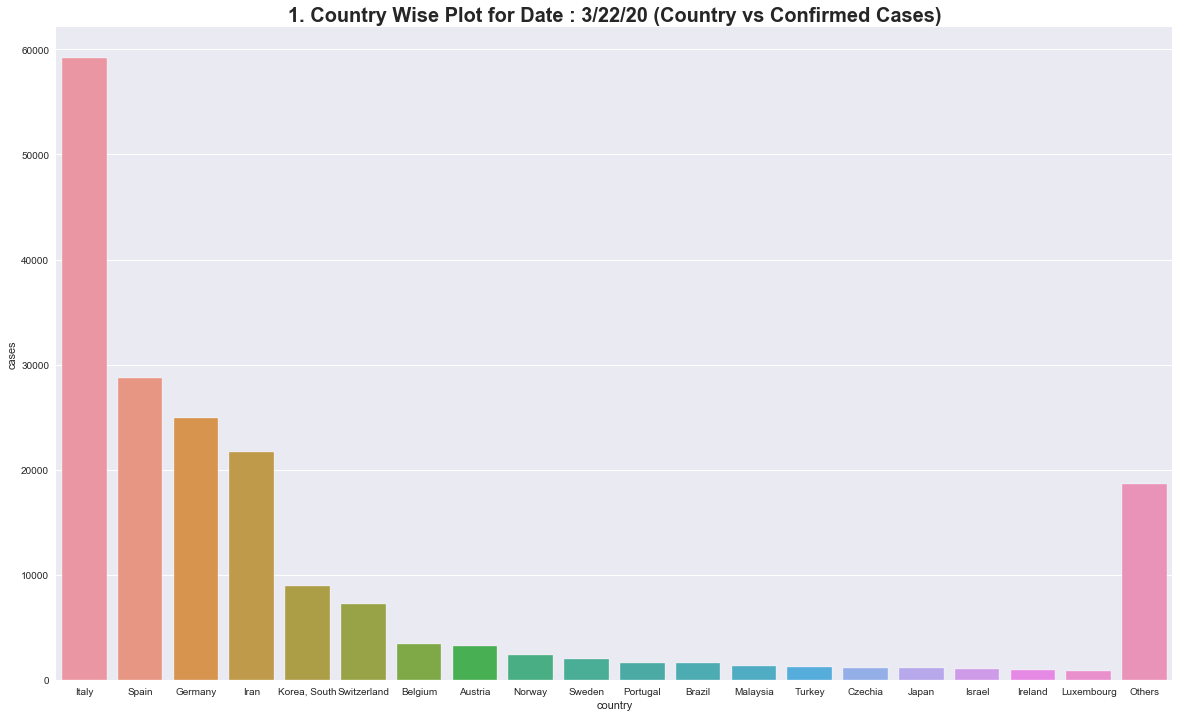

In [208]:
fig, ax = plt.subplots(figsize=(20,12))
corona = sns.barplot(x="country", y="cases", data=df_final)
plt.title('1. Country Wise Plot for Date : 3/22/20 (Country vs Confirmed Cases)', fontsize = 20, fontweight = 'bold')
plt.show(corona)

# 2. Date Wise Plot

In [75]:
X = []
Y = []

In [78]:
j = 0
for i in col:
    if j==0 :
        j += 1
        continue
    X.append(i)
    Y.append(df[i][1])
    print(df[i][1],i)

331 3/4/20
360 3/5/20
420 3/6/20
461 3/7/20
502 3/8/20
511 3/9/20
581 3/10/20
639 3/11/20
639 3/12/20
701 3/13/20
773 3/14/20
839 3/15/20
825 3/16/20
878 3/17/20
889 3/18/20
924 3/19/20
963 3/20/20
1007 3/21/20
1086 3/22/20


In [79]:
X

['3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20']

In [80]:
Y

[331,
 360,
 420,
 461,
 502,
 511,
 581,
 639,
 639,
 701,
 773,
 839,
 825,
 878,
 889,
 924,
 963,
 1007,
 1086]

In [83]:
dff = pd.DataFrame(list(zip(X, Y)),columns =['date', 'cases']) 

In [84]:
dff.head()

,date,cases
0,3/4/20,331
1,3/5/20,360
2,3/6/20,420
3,3/7/20,461
4,3/8/20,502


In [81]:
XX = pd.DataFrame(X)
YY = pd.DataFrame(Y)

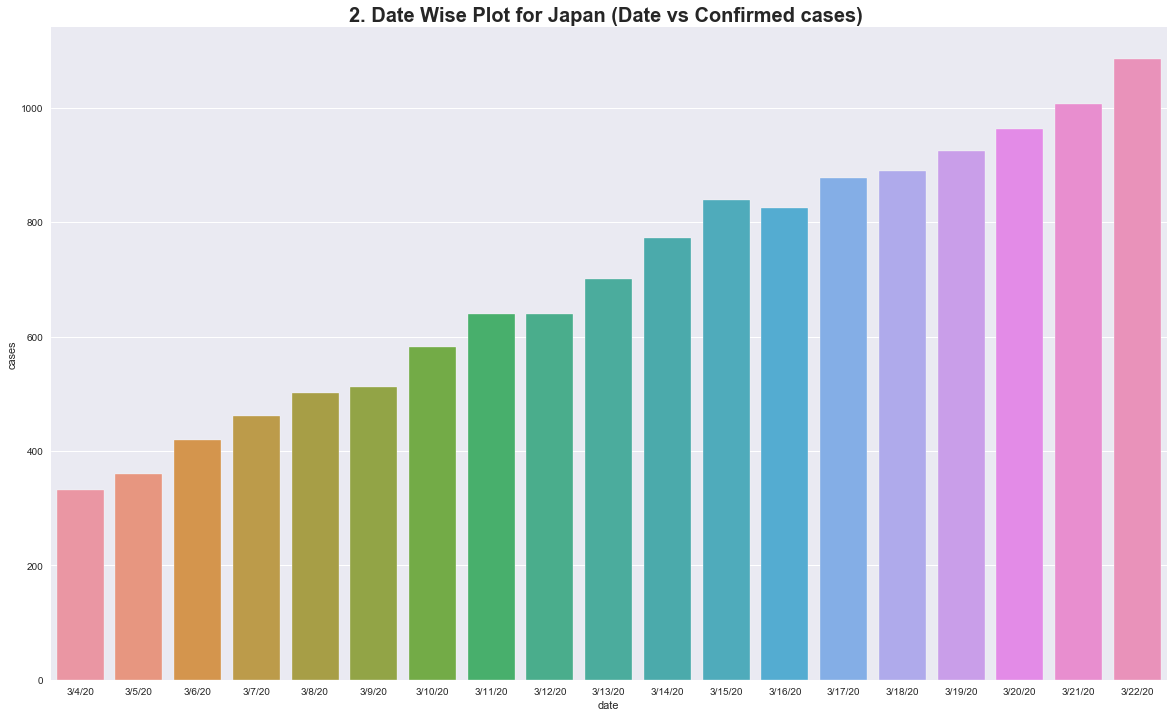

In [207]:
fig, ax = plt.subplots(figsize=(20,12))
corona = sns.barplot(x="date", y="cases", data=dff)
plt.title('2. Date Wise Plot for Japan (Date vs Confirmed cases) ', fontsize = 20, fontweight = 'bold')
plt.show(corona)

# 3. Continent Wise Plot

In [170]:
import pycountry_convert as pc

In [178]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# Example
country_name = 'Brazil'
print(country_to_continent(country_name))

South America


In [179]:
continent_count = np.array([0,0,0,0,0,0])

### Asia -> 0
### Africa -> 1
### North America -> 2
### South America -> 3
### Europe -> 4
### Australia -> 5

In [186]:
for i in range(len(df_new)):
    try:
        contin = country_to_continent(df_new.iloc[i][0])
        val = df_new.iloc[i][1]
        if(contin == 'Asia'):
            continent_count[0] = continent_count[0]+ val
        elif contin =='Africa' :
            continent_count[1] = continent_count[1]+ val
        elif contin =='North America' :
            continent_count[2] = continent_count[2]+ val
        elif contin =='South America' :
            continent_count[3] = continent_count[3]+ val
        elif contin =='Europe' :
            continent_count[4] = continent_count[4]+ val
        else :
            continent_count[5] = continent_count[5]+ val
    except:
        pass
    
        

In [187]:
continent_count

array([ 54408,   1381,   1042,   4096, 254446,     69])

In [188]:
labels = ['Asia','Africa','North America','South America','Europe','Australia']

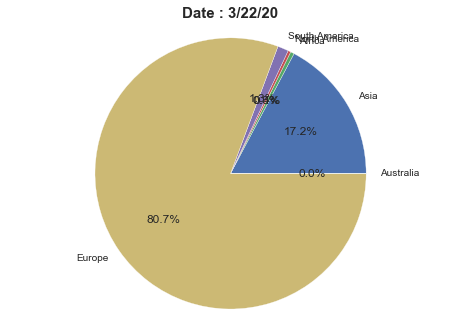

In [190]:
piechart = plt.pie(continent_count,  labels = labels, autopct = '%1.1f%%')
plt.title('Date : 3/22/20', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

In [191]:
dfff = pd.DataFrame(list(zip(labels,continent_count)),columns =['Continent', 'cases'])

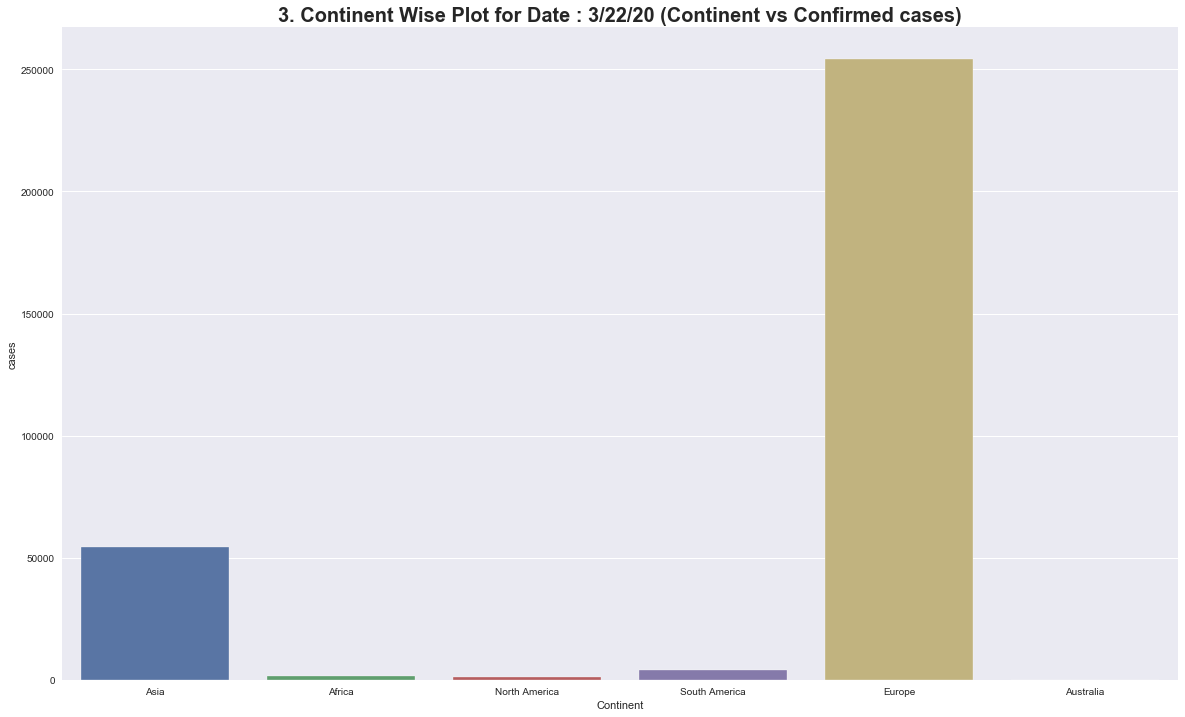

In [205]:
fig, ax = plt.subplots(figsize=(20,12))
corona = sns.barplot(x="Continent", y="cases", data=dfff)
plt.title('3. Continent Wise Plot for Date : 3/22/20 (Continent vs Confirmed cases)', fontsize = 20, fontweight = 'bold')
plt.show(corona)